#  <b><i><u><span style='color:black'> <span style='font-family:Helvetica'> ASSIGNMENT 1


#  <b><i><u><span style='color:black'> <span style='font-family:Helvetica'> Problem Statement 
* We have to preedict the sale price of heavy machinery using linear regression or K-NN model


## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvectia'>SALE PRICE PREDICTION


### <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvectia'>Importing the Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

### <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvectia'>Importing the Dataset

In [3]:
data = pd.read_csv('bpp_training_data.csv')
X = data
Y = data.iloc[:, 1:2]
X = X.drop(columns='SalePrice')
X

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,1126363,8434,132,17,1974,17,0,4593,1744,...,0,1,8,6,0,0,1989,1,17,17
1,1821514,1194089,10150,132,31,1980,31,0,1820,559,...,0,0,0,0,4,2,1989,1,31,31
2,1505138,1473654,4139,132,31,1978,31,0,2348,713,...,0,1,8,6,0,0,1989,1,31,31
3,1671174,1327630,8591,132,31,1980,31,0,1819,558,...,0,0,0,0,4,2,1989,1,31,31
4,1329056,1336053,4089,132,31,1984,31,0,2119,683,...,0,1,6,5,0,0,1989,1,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2192279,1701366,6272,136,78,1000,78,0,4215,1500,...,0,0,0,0,0,0,2009,3,19,78
299996,2192338,1787662,12919,136,78,1000,78,0,4216,1501,...,0,0,0,0,0,0,2009,3,19,78
299997,2433168,1714162,9580,136,78,2005,78,0,4514,1684,...,0,0,0,0,0,0,2009,3,19,78
299998,1586638,1386512,11398,132,78,2005,78,3,1202,354,...,0,1,6,6,0,0,2009,3,19,78


In [4]:
Y

,SalePrice
0,9500.0
1,14000.0
2,50000.0
3,16000.0
4,22000.0
...,...
299995,16500.0
299996,17000.0
299997,11500.0
299998,32000.0


* <b><i><u> To check the no of unique values in each column

In [5]:
data.nunique()

SalesID                     300000
SalePrice                      832
MachineID                   257087
ModelID                       4420
datasource                       4
auctioneerID                   358
YearMade                        68
MachineHoursCurrentMeter       358
UsageBand                        4
fiModelDesc                   4236
fiBaseModel                   1740
fiSecondaryDesc                148
fiModelSeries                   97
fiModelDescriptor              113
ProductSize                      7
fiProductClassDesc              72
state                           52
ProductGroup                     6
ProductGroupDesc                 6
Drive_System                     5
Enclosure                        7
Forks                            3
Pad_Type                         5
Ride_Control                     4
Stick                            3
Transmission                     9
Turbocharged                     3
Blade_Extension                  3
Blade_Width         

## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvetia'>  Check for missing values


In [6]:
data.shape

(300000, 56)

In [7]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
count,3.000000e+05,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1.658908e+06,30991.339990,1.186822e+06,6314.940467,132.379740,177.264650,1905.678890,177.264650,0.193833,1660.867117,...,0.316240,0.203283,1.328937,1.188987,0.693120,0.349573,2002.096633,6.321257,15.911637,177.264650
std,3.741182e+05,22836.063512,3.901941e+05,5531.594504,3.604955,105.040516,279.335539,105.040516,0.674342,1223.306905,...,0.664279,0.402591,2.691112,2.359794,1.511277,0.760303,5.309808,3.471672,8.404835,105.040516
min,1.139246e+06,4750.000000,0.000000e+00,43.000000,121.000000,2.000000,1000.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,2.000000
25%,1.400851e+06,14500.000000,1.103634e+06,3243.000000,132.000000,80.000000,1983.000000,80.000000,0.000000,729.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,3.000000,9.000000,80.000000
50%,1.599702e+06,24000.000000,1.271196e+06,4603.000000,132.000000,165.000000,1993.000000,165.000000,0.000000,1424.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,6.000000,16.000000,165.000000
75%,1.781636e+06,40000.000000,1.435632e+06,7524.000000,132.000000,271.000000,1998.000000,271.000000,0.000000,2302.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,9.000000,23.000000,271.000000
max,4.512524e+06,142000.000000,2.386425e+06,37198.000000,172.000000,365.000000,2009.000000,365.000000,3.000000,5055.000000,...,3.000000,2.000000,10.000000,7.000000,4.000000,5.000000,2009.000000,12.000000,31.000000,365.000000


* <b> <i> <u> To check whether there are any duplicates in the data


In [8]:
data.loc[data.duplicated()]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear


## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvetia'>  Correlation Matrix

#### <b><i><u> * By using the heat map we get to know the highly correlated features 

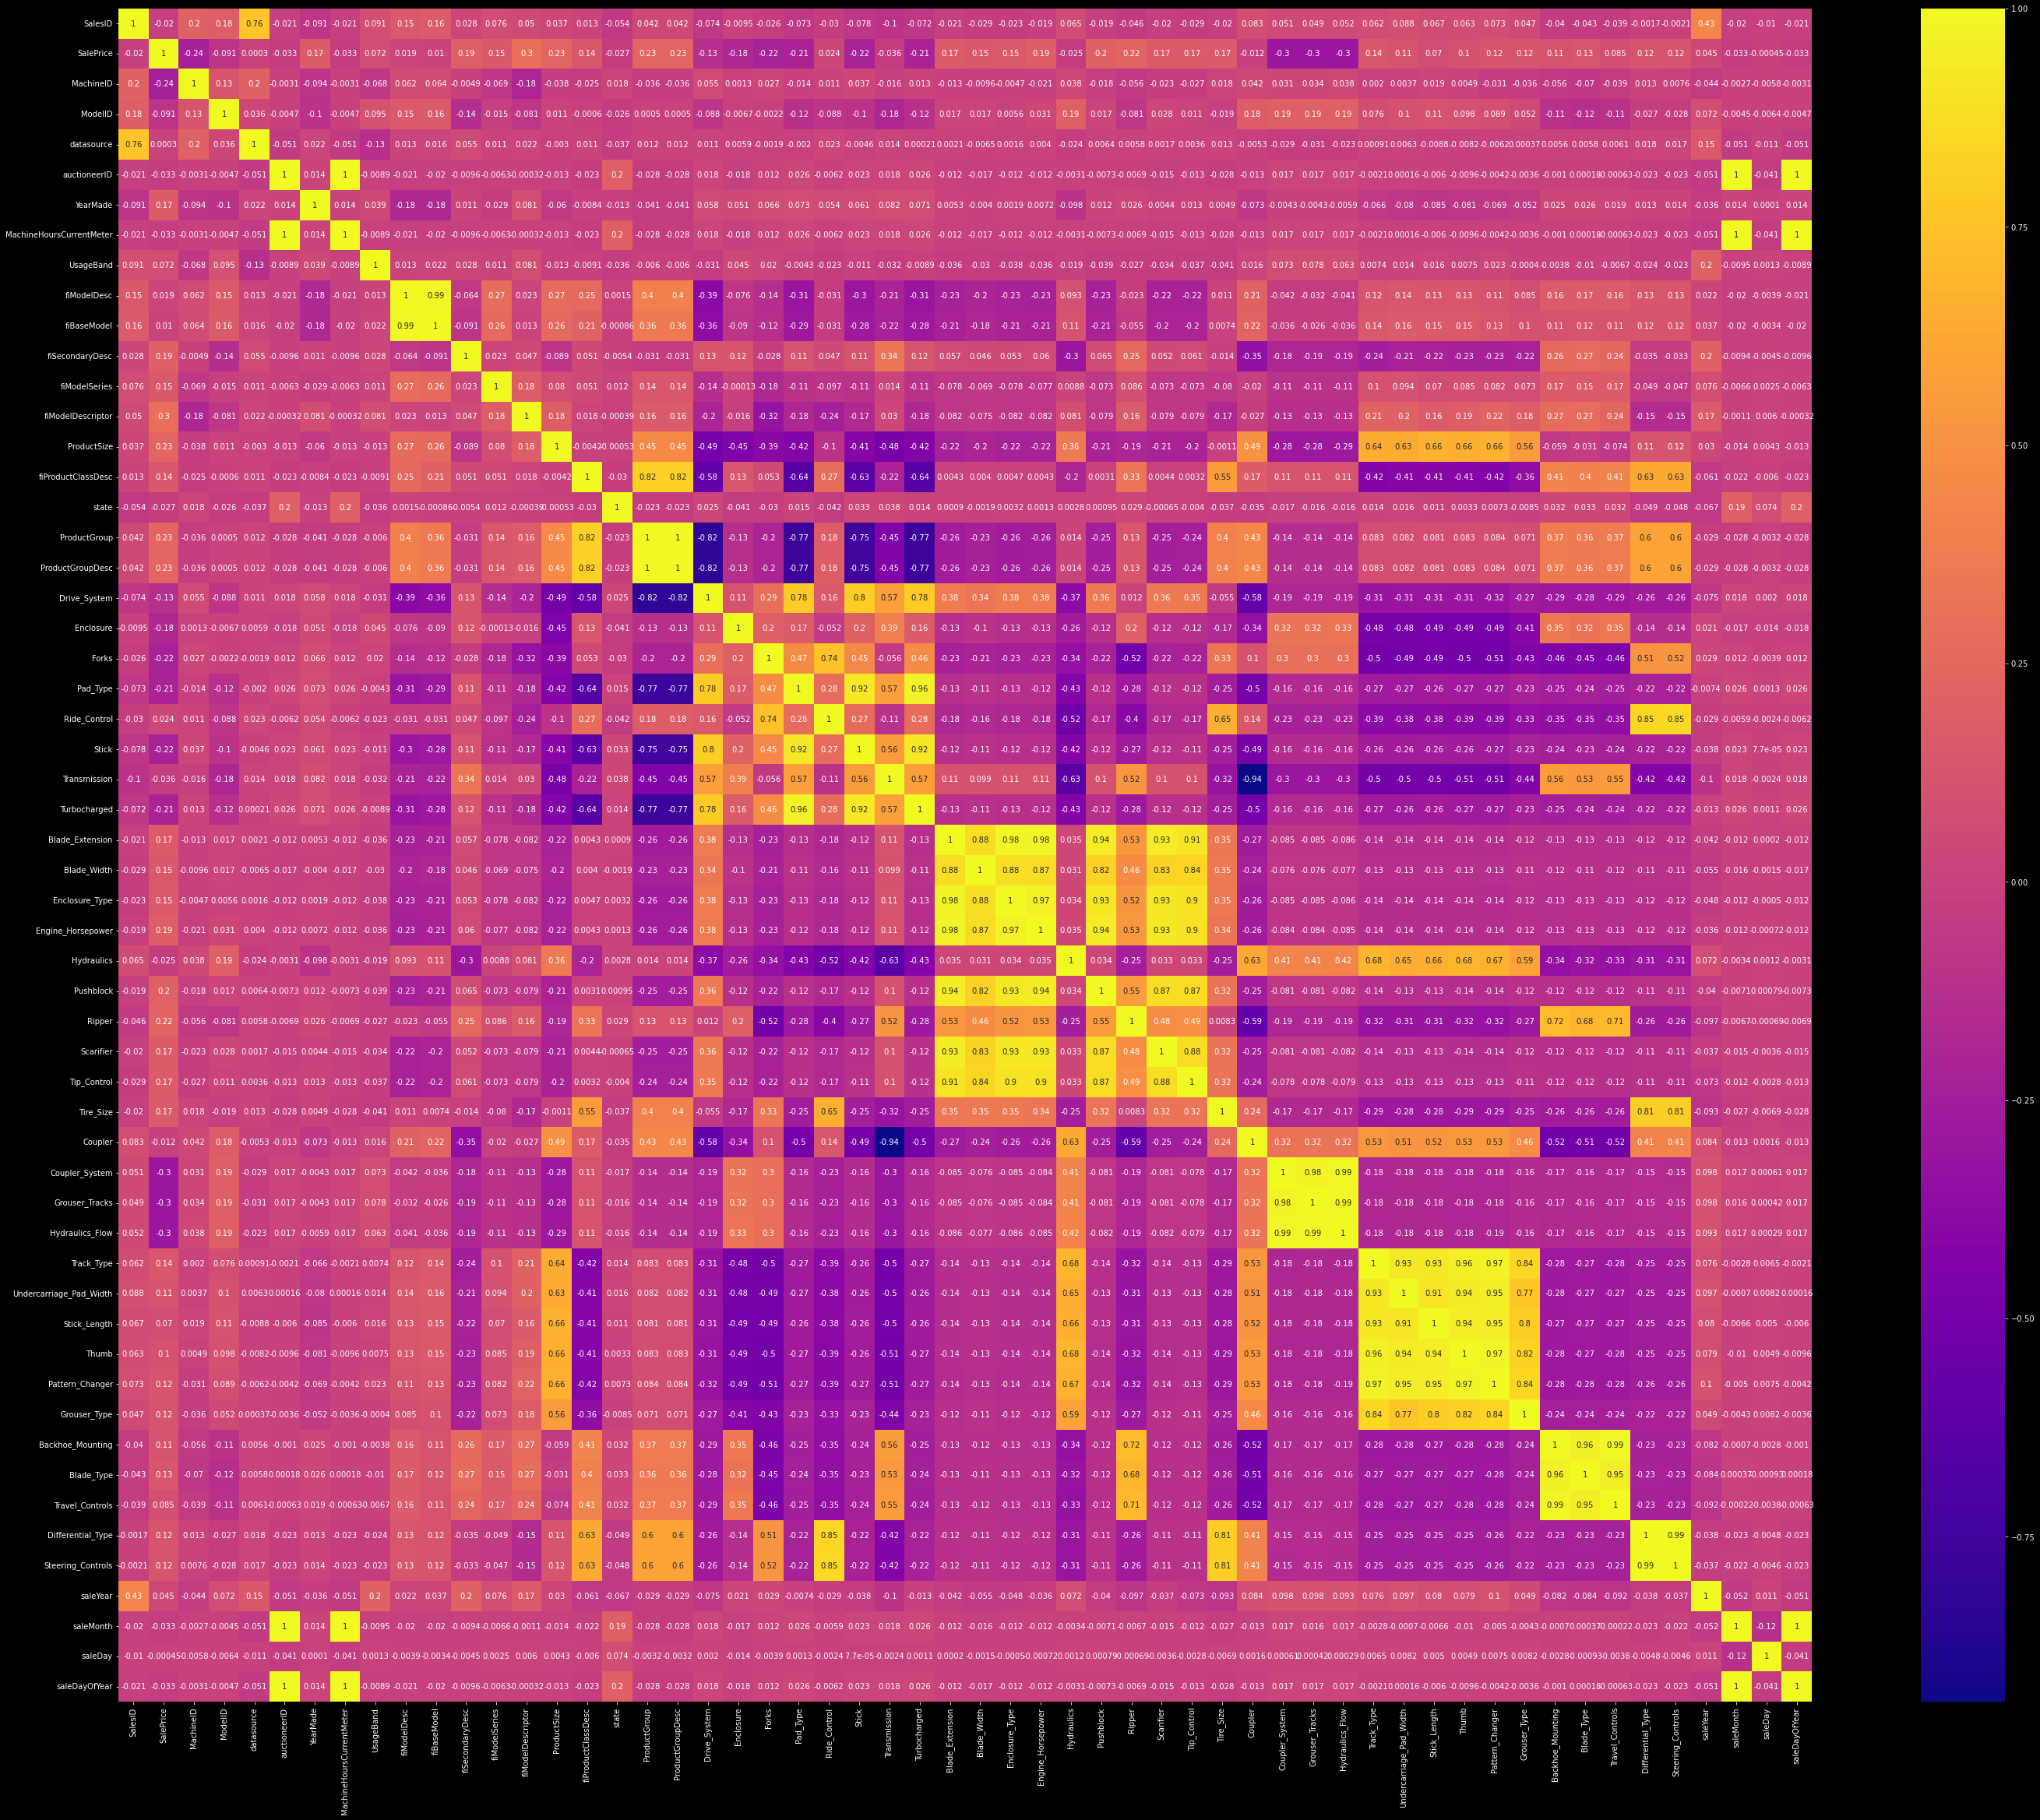

In [9]:
plt.figure(figsize=(50 , 40))
sns.heatmap(data.corr() , annot= True , square=True,cmap='plasma')
plt.show()

In [10]:
Threshold = 0.6
def correlation (data , Threshold) :
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i) :
            if abs(corr_matrix.iloc[i , j]) > Threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

High_correlated_features = correlation(data.iloc[: , :-1] , Threshold)
High_correlated_features

{'Backhoe_Mounting',
 'Blade_Type',
 'Blade_Width',
 'Coupler',
 'Differential_Type',
 'Drive_System',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Grouser_Tracks',
 'Grouser_Type',
 'Hydraulics',
 'Hydraulics_Flow',
 'MachineHoursCurrentMeter',
 'Pad_Type',
 'Pattern_Changer',
 'ProductGroup',
 'ProductGroupDesc',
 'Pushblock',
 'Ride_Control',
 'Scarifier',
 'Steering_Controls',
 'Stick',
 'Stick_Length',
 'Thumb',
 'Tip_Control',
 'Tire_Size',
 'Track_Type',
 'Travel_Controls',
 'Turbocharged',
 'Undercarriage_Pad_Width',
 'datasource',
 'fiBaseModel',
 'saleMonth'}

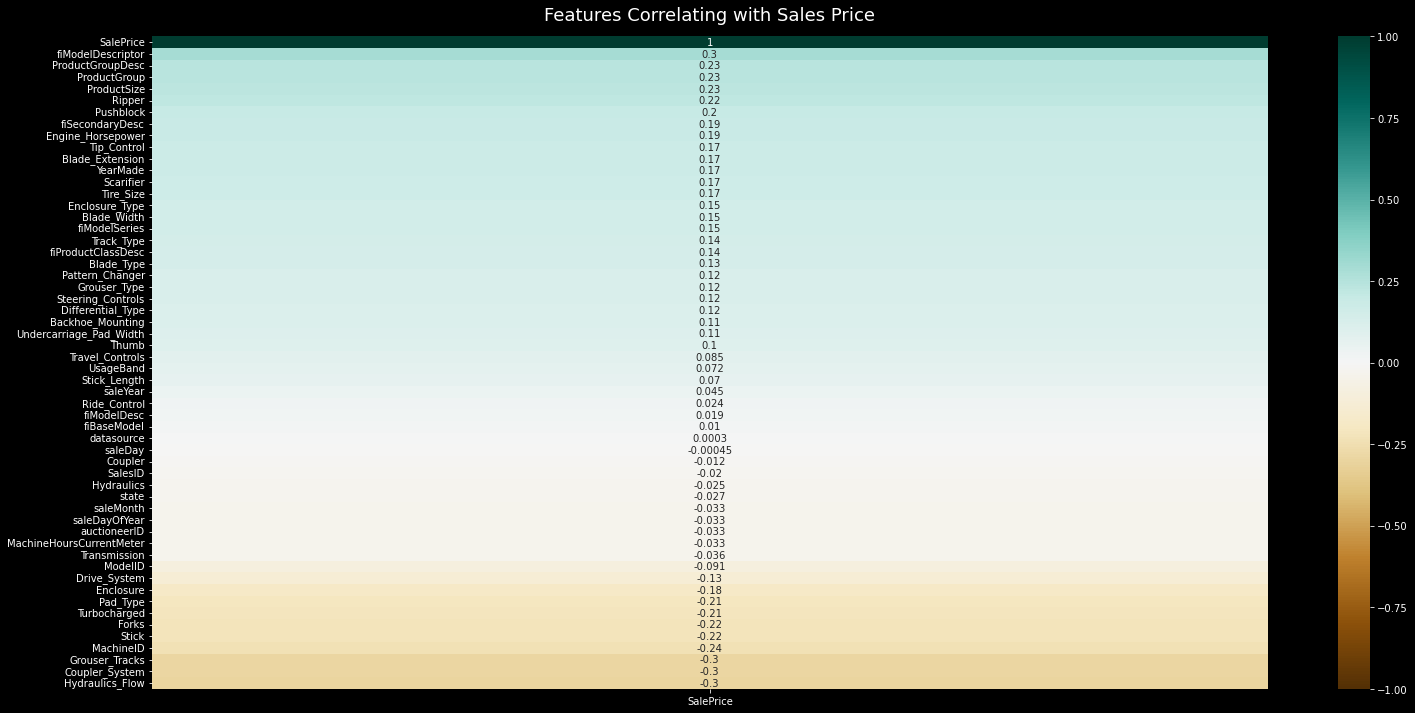

In [11]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

#### * <b> <i> <u> The above variables have a high correlation (i.e >0.60) so they can be removed which doesn't affect the table

## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvectia'>  Removing highly correalted columns


In [12]:
data_rem = ['Blade_Type','Blade_Width','Coupler','Differential_Type','Drive_System','Enclosure_Type','Engine_Horsepower','Grouser_Tracks','Grouser_Type','Hydraulics_Flow','MachineHoursCurrentMeter','Pad_Type','Pattern_Changer','ProductGroup','ProductGroupDesc','Pushblock','Scarifier','Steering_Controls','Stick','Stick_Length','Thumb','Tip_Control','Travel_Controls','Turbocharged','Undercarriage_Pad_Width',]


In [13]:
new_data = data.drop(columns = data_rem,axis =1 )
new_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,UsageBand,fiModelDesc,fiBaseModel,...,Hydraulics,Ripper,Tire_Size,Coupler_System,Track_Type,Backhoe_Mounting,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,17,1974,0,4593,1744,...,1,2,0,0,0,1,1989,1,17,17
1,1821514,14000.0,1194089,10150,132,31,1980,0,1820,559,...,1,0,17,0,0,0,1989,1,31,31
2,1505138,50000.0,1473654,4139,132,31,1978,0,2348,713,...,1,2,0,0,0,1,1989,1,31,31
3,1671174,16000.0,1327630,8591,132,31,1980,0,1819,558,...,1,0,17,0,0,0,1989,1,31,31
4,1329056,22000.0,1336053,4089,132,31,1984,0,2119,683,...,1,2,0,0,0,1,1989,1,31,31


#### <b><i><u> * After removing highly related features we ended up getting 31 independent variables from 56 variables

## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvetia'>  Changing the dependent and the independent variables



In [14]:
X_new = new_data.drop(columns='SalePrice',axis=1)
Y_new = Y

In [15]:
Y_new

,SalePrice
0,9500.0
1,14000.0
2,50000.0
3,16000.0
4,22000.0
...,...
299995,16500.0
299996,17000.0
299997,11500.0
299998,32000.0


In [16]:
X_new

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Hydraulics,Ripper,Tire_Size,Coupler_System,Track_Type,Backhoe_Mounting,saleYear,saleMonth,saleDay,saleDayOfYear
0,1646770,1126363,8434,132,17,1974,0,4593,1744,0,...,1,2,0,0,0,1,1989,1,17,17
1,1821514,1194089,10150,132,31,1980,0,1820,559,0,...,1,0,17,0,0,0,1989,1,31,31
2,1505138,1473654,4139,132,31,1978,0,2348,713,59,...,1,2,0,0,0,1,1989,1,31,31
3,1671174,1327630,8591,132,31,1980,0,1819,558,0,...,1,0,17,0,0,0,1989,1,31,31
4,1329056,1336053,4089,132,31,1984,0,2119,683,21,...,1,2,0,0,0,1,1989,1,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2192279,1701366,6272,136,78,1000,0,4215,1500,0,...,4,0,0,1,0,0,2009,3,19,78
299996,2192338,1787662,12919,136,78,1000,0,4216,1501,0,...,4,0,0,1,0,0,2009,3,19,78
299997,2433168,1714162,9580,136,78,2005,0,4514,1684,0,...,4,0,0,1,0,0,2009,3,19,78
299998,1586638,1386512,11398,132,78,2005,3,1202,354,75,...,1,2,0,0,0,1,2009,3,19,78


## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvectia'> Visualizing the  Sale Price

In [17]:
new_data.nunique()

SalesID               300000
SalePrice                832
MachineID             257087
ModelID                 4420
datasource                 4
auctioneerID             358
YearMade                  68
UsageBand                  4
fiModelDesc             4236
fiBaseModel             1740
fiSecondaryDesc          148
fiModelSeries             97
fiModelDescriptor        113
ProductSize                7
fiProductClassDesc        72
state                     52
Enclosure                  7
Forks                      3
Ride_Control               4
Transmission               9
Blade_Extension            3
Hydraulics                13
Ripper                     5
Tire_Size                 18
Coupler_System             3
Track_Type                 3
Backhoe_Mounting           3
saleYear                  21
saleMonth                 12
saleDay                   31
saleDayOfYear            358
dtype: int64

<Figure size 2880x1800 with 0 Axes>

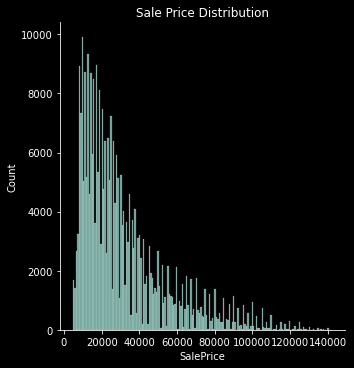

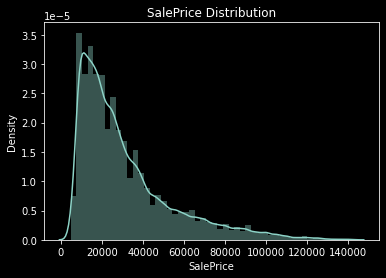

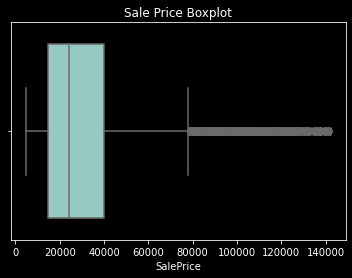

In [18]:
plt.figure(figsize=(40, 25))


sns.displot(data['SalePrice'])
plt.title('Sale Price Distribution')
plt.show()


sns.distplot(data['SalePrice'])
plt.title('SalePrice Distribution')
plt.show()


sns.boxplot(data['SalePrice'])
plt.title('Sale Price Boxplot')

plt.show()


In [19]:
print(data['SalePrice'].describe(percentiles= [0.25, 0.5, 0.75, 0.85, 0.95, 1.0]))

count    300000.000000
mean      30991.339990
std       22836.063512
min        4750.000000
25%       14500.000000
50%       24000.000000
75%       40000.000000
85%       53500.000000
95%       80000.000000
100%     142000.000000
max      142000.000000
Name: SalePrice, dtype: float64


#### <b> <u> <i> Inference : 
* <i><b><u> From the boxplot we can observe that most of the prices lie below 40,000
* <b><i><u> The data points are far spread out from the mean, which indicates a high variance in the sale price(i.e 85% of the prices lie below 53,500 whereas the remaining 15% lie between53,500 and 142,000)

## <b><i><u><span style='color:green'><span style='background :white' > <span style='font-family:Helvetia'>  Visualizing the Categorical data
             



#### <b><i><u> * Usage Band

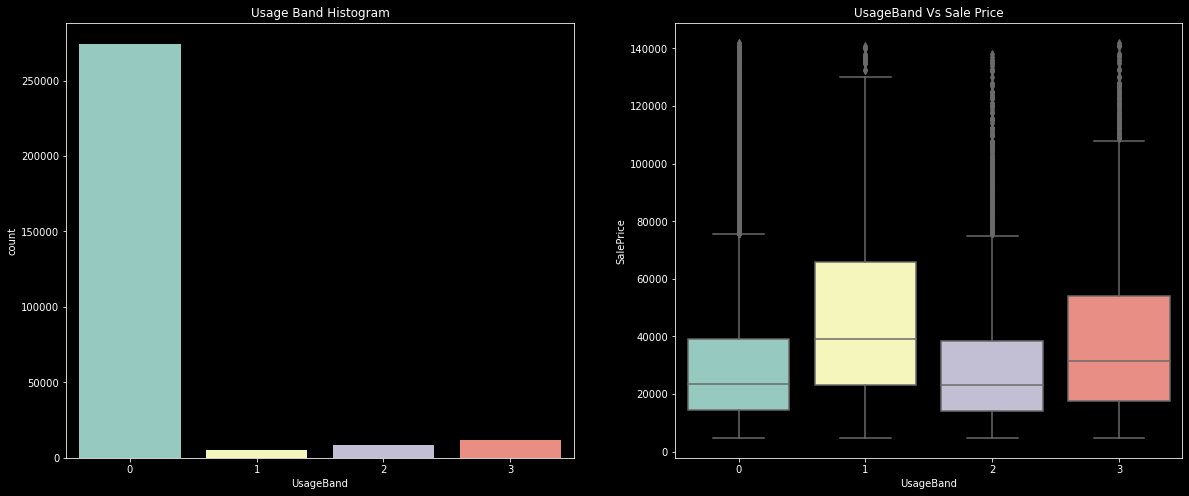

In [20]:
plt.figure(figsize = (20 , 8))

plt.subplot(1,2,1)
plt.title('Usage Band Histogram')
sns.countplot(data['UsageBand'] , palette = 'Set3')

plt.subplot(1,2,2)
plt.title('UsageBand Vs Sale Price')
sns.boxplot(x= data['UsageBand'], y=data['SalePrice'])



plt.show()

#### <b><i><u> Inference : 
* The most used UsageBand is band '0'
* Among the 4 UsageBands band '1' is the most expensive band

#### <b><i><u> * Enclosure
#### <b><i><u> * Forks
#### <b><i><u> * Transmission
#### <b><i><u> * Hydraulics
#### <b><i><u> * Blade Extension
#### <b><i><u> * Ripper 
#### <b><i><u> * Tire Size

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

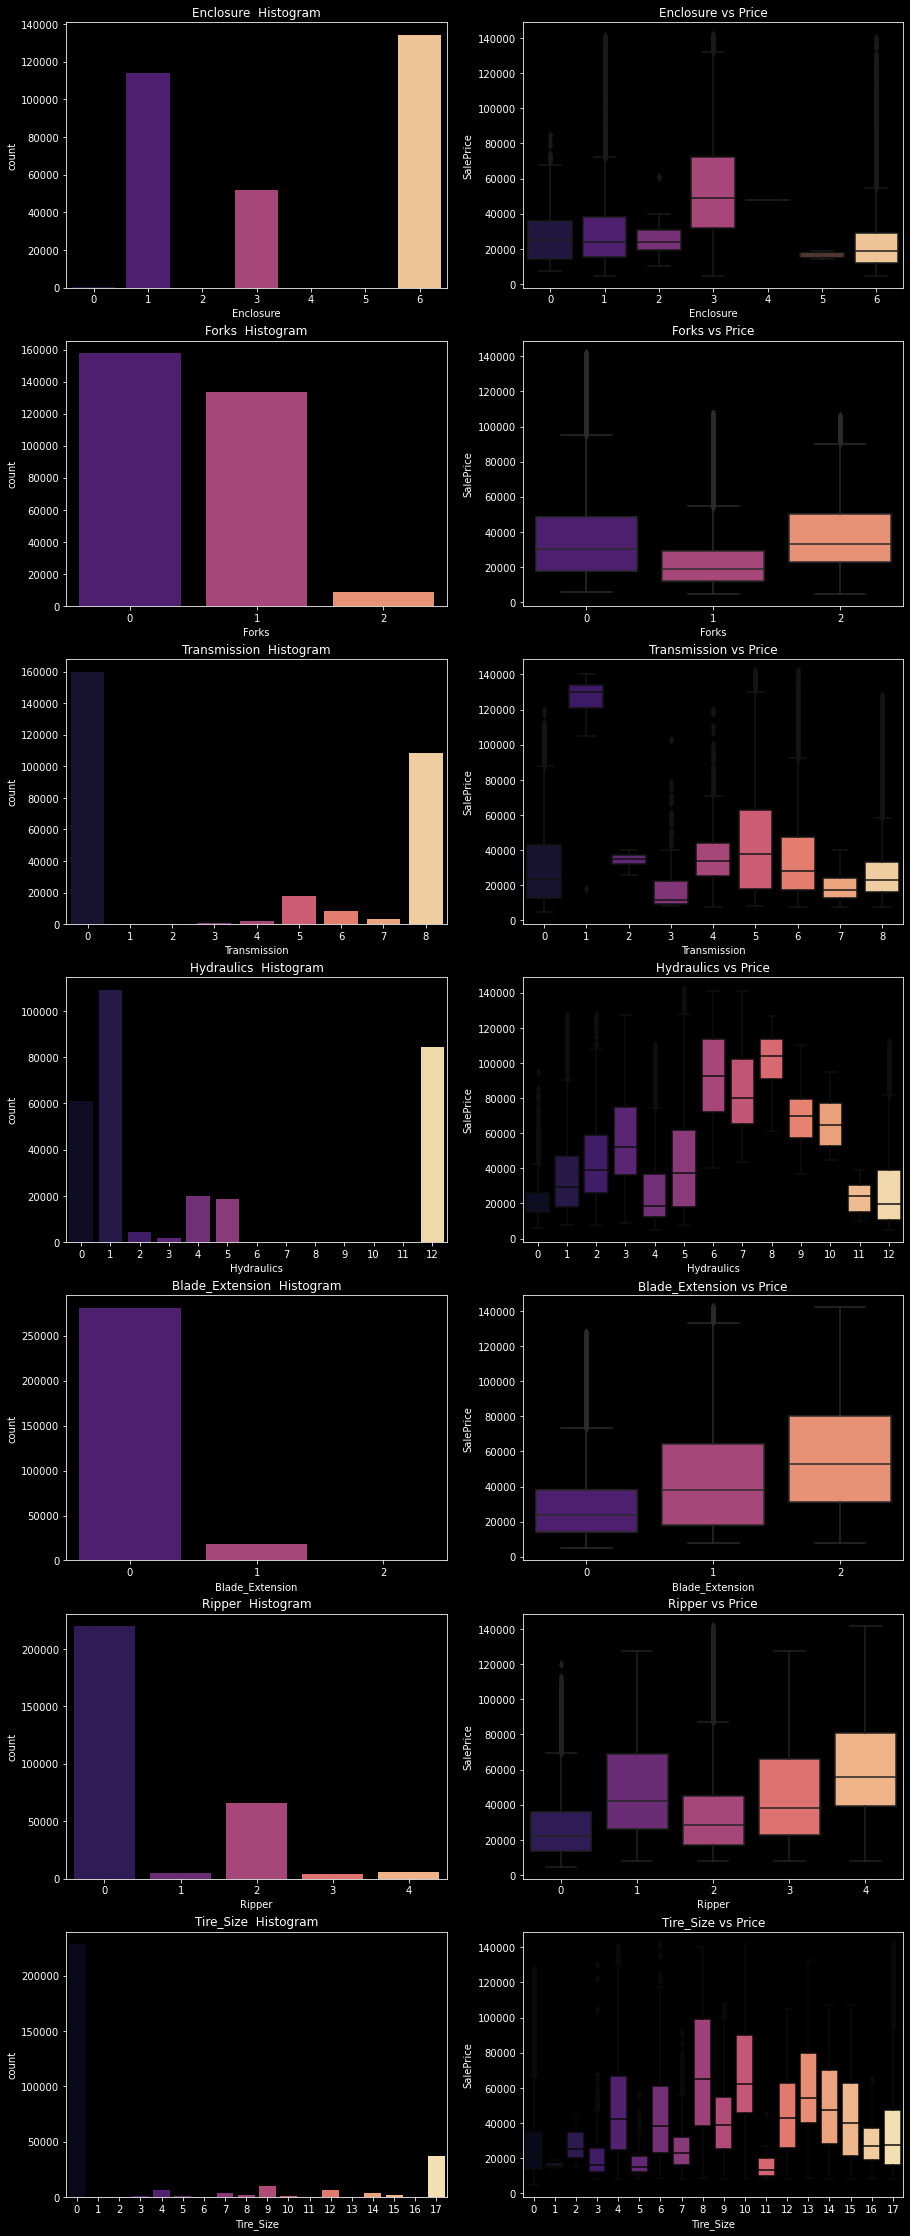

In [21]:
def plot_count(x , fig) :
    plt.subplot(7 , 2 , fig)
    plt.title(x +'  Histogram')
    sns.countplot(data[x] , palette = ('magma'))
    plt.subplot(7 , 2 , (fig + 1))
    plt.title(x +' vs Price')
    sns.boxplot(x = data[x] , y = data['SalePrice'] , palette = ('magma'))

plt.figure(figsize = (15, 40))

plot_count('Enclosure' , 1)
plot_count('Forks',3)
plot_count('Transmission',5)
plot_count('Hydraulics' ,7)
plot_count('Blade_Extension',9)
plot_count('Ripper' , 11)
plot_count('Tire_Size' ,13)

plt.tight_layout

#### <b><i><u> Inference : 
* Enclosure 6 has the highest count (i.e over 130,000) and Enclosure 3 has the highest sale price
* Fork 0 has the highest count (nearly 160,000) and Fork 0 and Fork 3 has almost the same sale price
* Transmission 0 has the highest count and Transmission 1 hs the highest sale price
* Hydraulics 1 has the highest count and Hydraulics 6 and 8 have the same sale price
* Balde Extension 1 has the highest count over 250,000 and Blade Extension 2 has the highest sale price
* Ripper 0 has the highest count and Ripper 4 has the highest sale price
* Tire size 0 has the highest count and Tire size 8 has the highest sale price

## <b><u><i> <span style = 'color : green ' > <span style = 'background : white '> <span style = 'font-family : Helvectia'> Splitting the data into Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.25, random_state=0)

## <b><u><i> <span style = 'color : green ' > <span style = 'background : white '> <span style = 'font-family : Helvectia'>  Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train, Y_train)

array([[ 1.80579609,  0.4557762 , -0.80435282, ...,  1.63447918,
        -0.58413746,  1.59577293],
       [-0.5004959 ,  0.48284906,  3.24818879, ...,  0.7702952 ,
         1.43857975,  0.90070157],
       [-0.99125   , -0.01562567, -0.56744557, ...,  0.7702952 ,
         0.60569619,  0.83405089],
       ...,
       [-0.52139876,  0.75335978,  0.13478295, ..., -1.2461341 ,
        -1.41702103, -1.35589997],
       [-0.77059417,  0.68967296, -0.39125596, ...,  1.05835652,
         0.01077936,  1.0625675 ],
       [-0.3713765 ,  0.2250675 , -0.8583843 , ...,  1.05835652,
        -0.8221042 ,  0.99591682]])

## <b><u><i> <span style = 'color : green ' > <span style = 'background : white '> <span style = 'font-family : Helvectia'> Applying Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred = lr.predict(X_train)
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred)

0.359177004660569

## <b><u><i> <span style = 'color : green ' > <span style = 'background : white '> <span style = 'font-family : Helvectia'> Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor()
DR.fit(X_train, Y_train)

DecisionTreeRegressor()

In [27]:
Y_pred = DR.predict(X_train)
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred)

1.0

## <b><u><i> <span style = 'color : green ' > <span style = 'background : white '> <span style = 'font-family : Helvectia'> Random Forest Regression

In [28]:
x_train , x_test , y_train , y_test = train_test_split(X_new , Y_new , test_size = 0.3)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train , y_train)


from sklearn import metrics
y_pred = regressor.predict(x_train)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9866139622896136
Adjusted R^2: 0.9866120497161799
MAE: 1659.1175102380948
MSE: 7031660.035405293
RMSE: 2651.727745339874


In [29]:
data_test = pd.read_excel('bpp_test.xlsx')


In [30]:
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfYear
0,2281791,891349,1634,136,78,2003,78,0,2330,706,...,0,1,7,6,0,0,2009,3,19,78
1,2192394,1726692,12924,136,78,1000,78,0,4498,1672,...,0,0,0,0,0,0,2009,3,19,78
2,2369596,1122452,15044,136,78,1994,78,0,2644,827,...,3,0,0,0,0,0,2009,3,19,78
3,2233945,92096,3858,136,78,1999,78,0,1772,535,...,0,0,0,0,4,2,2009,3,19,78
4,2433167,1696810,9580,136,78,2005,78,0,4514,1684,...,0,0,0,0,0,0,2009,3,19,78


In [31]:
data_rem = ['Blade_Type','Blade_Width','Coupler','Differential_Type','Drive_System','Enclosure_Type','Engine_Horsepower','Grouser_Tracks','Grouser_Type','Hydraulics_Flow','MachineHoursCurrentMeter','Pad_Type','Pattern_Changer','ProductGroup','ProductGroupDesc','Pushblock','Scarifier','Steering_Controls','Stick','Stick_Length','Thumb','Tip_Control','Travel_Controls','Turbocharged','Undercarriage_Pad_Width',]

In [32]:
new_data = data_test.drop(columns = data_rem,axis =1 )
new_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Hydraulics,Ripper,Tire_Size,Coupler_System,Track_Type,Backhoe_Mounting,saleYear,saleMonth,saleDay,saleDayOfYear
0,2281791,891349,1634,136,78,2003,0,2330,706,117,...,1,2,0,0,0,1,2009,3,19,78
1,2192394,1726692,12924,136,78,1000,0,4498,1672,0,...,4,0,0,1,0,0,2009,3,19,78
2,2369596,1122452,15044,136,78,1994,0,2644,827,0,...,12,0,0,0,2,0,2009,3,19,78
3,2233945,92096,3858,136,78,1999,0,1772,535,59,...,1,0,17,0,0,0,2009,3,19,78
4,2433167,1696810,9580,136,78,2005,0,4514,1684,0,...,4,0,0,1,0,0,2009,3,19,78


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_x_scale = scaler.fit_transform(new_data)

In [34]:
test_x_scale

array([[-0.40673589, -0.78865401, -0.90998146, ..., -0.97040345,
         0.26058204, -0.96701862],
       [-0.46124513,  0.66302866,  0.55847113, ..., -0.97040345,
         0.26058204, -0.96701862],
       [-0.35319737, -0.38703668,  0.83421245, ..., -0.97040345,
         0.26058204, -0.96701862],
       ...,
       [ 2.05128513,  0.99621204,  1.1203591 , ..., -0.67130208,
         1.32423823, -0.56039517],
       [ 2.02276255, -1.45213772, -0.6858766 , ..., -0.67130208,
         1.32423823, -0.56039517],
       [ 2.03336233,  0.91082907, -0.51106701, ..., -0.67130208,
         1.32423823, -0.56039517]])

In [35]:
new_y_pred = regressor.predict(new_data)
new_y_pred

array([68270., 15668., 19894., ..., 26775., 57340., 29305.])

In [36]:
new_y_pred.shape

(112698,)

In [37]:
dataframe=pd.DataFrame(new_y_pred, columns=['Predicted Sale Price']) 

* TO convert it into a data frame

In [38]:
dataframe

,Predicted Sale Price
0,68270.0
1,15668.0
2,19894.0
3,68850.0
4,11422.5
...,...
112693,21642.5
112694,8506.5
112695,26775.0
112696,57340.0


In [39]:
dataframe.to_csv('Predicted Sale Price.csv')